In [29]:
import os
import numpy as np
import pandas as pd
import tensorflow
from keras.models import Sequential # To initialise the nn as a sequence of layers
from keras.layers import Convolution2D # To make the convolution layer for 2D images
from keras.layers import MaxPooling2D # 
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import CSVLogger
from tensorflow.keras.optimizers import RMSprop
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow import data
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from tensorflow import repeat as rp

csv=CSVLogger("2_adam_HOG.log")
#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32,(32,32),input_shape = (224,224,1), activation = 'relu',strides=2,name='convo1'))
classifier.summary()
#classifier.add(Convolution2D(64,(3,3), activation = 'relu',name='convo2'))
# Step 1 - Pooling
classifier.add(MaxPooling2D(pool_size = (3,3)))

# Step 2 - Convolution
#classifier.add(Convolution2D(64,(3,3),activation = 'relu',name='convo3'))
# Step 2 - Pooling
#classifier.add(MaxPooling2D(pool_size = (2,2)))
# Step 3 - Convolution
#classifier.add(Convolution2D(64,(3,3),activation = 'relu',name='convo4'))
# Step 3 - Pooling
#classifier.add(MaxPooling2D(pool_size = (2,2)))
#Step 4 - Flattening

classifier.add(Flatten())

classifier.add(BatchNormalization())
classifier.add(Dropout((0.5)))
classifier.add(Dense(512, activation = 'relu'))

'''classifier.add(BatchNormalization())
classifier.add(Dropout((0.5)))
classifier.add(Dense(512, activation = 'relu'))
'''

classifier.add(BatchNormalization())
classifier.add(Dropout((0.4)))
classifier.add(Dense(10, activation = 'softmax'))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convo1 (Conv2D)             (None, 97, 97, 32)        32800     
                                                                 
Total params: 32,800
Trainable params: 32,800
Non-trainable params: 0
_________________________________________________________________


In [30]:
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\codesITA'

In [31]:
import matplotlib.pyplot as plt
adam = Adam(epsilon = 0.01)
classifier.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

curr_path = os.getcwd()
basefolder = os.path.dirname(curr_path)
train_folder = os.path.join(basefolder, "DatasetITAHog\\Train")
test_folder = os.path.join(basefolder, "DatasetITAHog\\Test")
train_set=tensorflow.data
train_set = train_datagen.flow_from_directory(train_folder,target_size=(224, 224),batch_size=32,class_mode='categorical',color_mode='grayscale')


test_set = test_datagen.flow_from_directory(test_folder,target_size=(224, 224),batch_size=32,class_mode='categorical',color_mode='grayscale')
classifier.metrics_names




Found 608 images belonging to 10 classes.
Found 69 images belonging to 10 classes.


[]

In [32]:
#nb_conda_kernels

In [33]:
history = classifier.fit(train_set,steps_per_epoch=train_set.n/32,epochs=50,validation_data=test_set,validation_steps=test_set.n/32,callbacks=[csv],verbose=1)

Epoch 1/50
19/19 [==============================] - 24s 1s/step - loss: 2.7043 - accuracy: 0.2829 - val_loss: 2.2747 - val_accuracy: 0.1884
Epoch 2/50
19/19 [==============================] - 23s 1s/step - loss: 1.0736 - accuracy: 0.6743 - val_loss: 2.1944 - val_accuracy: 0.3768
Epoch 3/50
19/19 [==============================] - 23s 1s/step - loss: 0.4101 - accuracy: 0.8766 - val_loss: 2.1790 - val_accuracy: 0.2464
Epoch 4/50
19/19 [==============================] - 23s 1s/step - loss: 0.1759 - accuracy: 0.9622 - val_loss: 2.1760 - val_accuracy: 0.1304
Epoch 5/50
19/19 [==============================] - 23s 1s/step - loss: 0.0825 - accuracy: 0.9836 - val_loss: 2.1616 - val_accuracy: 0.1304
Epoch 6/50
19/19 [==============================] - 23s 1s/step - loss: 0.0442 - accuracy: 0.9918 - val_loss: 2.1381 - val_accuracy: 0.1304
Epoch 7/50
19/19 [==============================] - 23s 1s/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 2.1166 - val_accuracy: 0.1449
Epoch 8/50
19/19 [==

In [36]:
classifier.save('2_adam_HOG.h5')


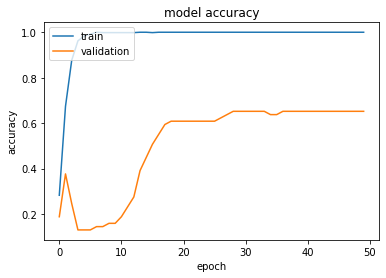

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy']) #validation
plt.plot(history.history['val_accuracy']) #train
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()